# 测量到另一个标签图像中细胞的距离
在一些使用多个标记物对细胞、细胞核和其他细胞器进行成像的项目中，我们对测量具有不同表达模式的细胞之间的距离感兴趣。给定一个并非所有细胞都表达某种特定标记物的组织，我们可能想要测量每个细胞到下一个表达该标记物的细胞的距离。因此，我们想要测量并在地图上可视化该距离。

In [1]:
import numpy as np
import pyclesperanto_prototype as cle
import pandas as pd

cle.get_device()

<gfx90c on Platform: AMD Accelerated Parallel Processing (2 refs)>

我们的起点是一个标签图像和另一个标签图像，其中第一个图像中的一些标签是从中选择的。第一个标签图像代表所有细胞。第二个标签图像代表表达该标记物的细胞。

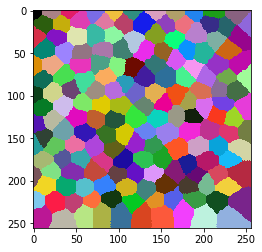

In [2]:
label_image = cle.artificial_tissue_2d()
cle.imshow(label_image, labels=True)

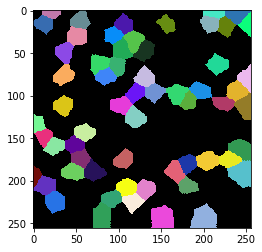

In [3]:
random_vector = np.random.random((1, int(label_image.max() + 1)))
sparse_labels = cle.exclude_labels_with_values_out_of_range(random_vector, label_image, minimum_value_range=0, maximum_value_range=0.3)
cle.imshow(sparse_labels, labels=True)

现在，我们对`label_image`中的每个标签计算在`sparse_labels`图像中与之接近的标签数量。为了测量距离，我们使用质心距离。

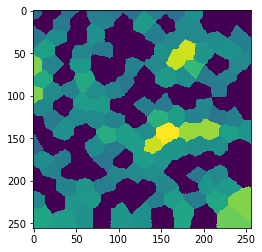

In [4]:
distance_map = cle.average_distance_to_n_nearest_other_labels_map(label_image, sparse_labels, n=1)
cle.imshow(distance_map)

我们还可以读取这些值。

In [5]:
statistics = cle.statistics_of_labelled_pixels(distance_map, label_image)

table = pd.DataFrame(statistics)

# 上面的表格包含了太多信息。
# 因此，我们重命名一个列并删除大部分其他列
table = table.rename(columns={"mean_intensity": "centroid_distance"})
table[['label', 'centroid_distance']]

label  centroid_distance
0        1          13.957838
1        2           0.000000
2        3          15.516336
3        4          17.409723
4        5          16.673353
..     ...                ...
170    171          20.870539
171    172           0.000000
172    173          24.419371
173    174           0.000000
174    175          32.159912

[175 rows x 2 columns]